In [3]:
with open('data/Test_second/epigraphic_corpus-2.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

In [4]:
lines[0]

'<doc id="file32708451" filename="Epigrafika" parent_folder="web_wikipedia" url="https://uk.wikipedia.org/wiki/%D0%95%D0%BF%D1%96%D0%B3%D1%80%D0%B0%D1%84%D1%96%D0%BA%D0%B0">\n'

In [5]:
def split_txt_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    total_lines = len(lines)
    
    lines_per_part = total_lines // 40

    remainder = total_lines % 40
    
    output_dir = "data/Test_second"
    
    import os
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    start = 0
    for i in range(40):
        if i < remainder:
            lines_in_part = lines_per_part + 1
        else:
            lines_in_part = lines_per_part
        
        end = start + lines_in_part
        part_lines = lines[start:end]

        part_file_path = os.path.join(output_dir, f"part_{i + 1}.txt")
        with open(part_file_path, 'w', encoding='utf-8') as part_file:
            part_file.writelines(part_lines)

        start = end
    
    print(f"Original file has been seperated to 40 parts, and saved in {output_dir}.")

split_txt_file('data/Test_second/epigraphic_corpus-2.txt')


Original file has been seperated to 40 parts, and saved in data/Test_second.


In [8]:
import spacy
model_path = 'model/first_model'
nlp = spacy.load(model_path)
nlp.add_pipe('sentencizer')

In [28]:
from tqdm import tqdm
import spacy
import pandas as pd

# Load the spaCy model
# nlp = spacy.load('uk_core_news_lg')

# Assume 'annotations' DataFrame is loaded and combined
# Tokenize keywords in advance
annotation_path = 'data/annotation/annotation.csv'
annotations = pd.read_csv(annotation_path)
annotations['keyword_tokens'] = annotations['keywords'].apply(lambda kw: [token.text for token in nlp(kw)])

# List of file paths
files = [
    "data/Test_second/part_1.txt",
    "data/Test_second/part_2.txt",
    "data/Test_second/part_3.txt",
    "data/Test_second/part_4.txt",
    "data/Test_second/part_5.txt",
    "data/Test_second/part_6.txt",
    "data/Test_second/part_7.txt",
    "data/Test_second/part_8.txt",
    "data/Test_second/part_9.txt",
    "data/Test_second/part_10.txt",
    "data/Test_second/part_11.txt",
    "data/Test_second/part_12.txt",
    "data/Test_second/part_13.txt",
    "data/Test_second/part_14.txt",
    "data/Test_second/part_15.txt",
    "data/Test_second/part_16.txt",
    "data/Test_second/part_17.txt",
    "data/Test_second/part_18.txt",
    "data/Test_second/part_19.txt",
    "data/Test_second/part_20.txt",
    "data/Test_second/part_21.txt",
    "data/Test_second/part_22.txt",
    "data/Test_second/part_23.txt",
    "data/Test_second/part_24.txt",
    "data/Test_second/part_25.txt",
    "data/Test_second/part_26.txt",
    "data/Test_second/part_27.txt",
    "data/Test_second/part_28.txt",
    "data/Test_second/part_29.txt",
    "data/Test_second/part_30.txt",
    "data/Test_second/part_31.txt",
    "data/Test_second/part_32.txt",
    "data/Test_second/part_33.txt",
    "data/Test_second/part_34.txt",
    "data/Test_second/part_35.txt",
    "data/Test_second/part_36.txt",
    "data/Test_second/part_37.txt",
    "data/Test_second/part_38.txt",
    "data/Test_second/part_39.txt",
    "data/Test_second/part_40.txt",
    # Assume other files as needed
]


def predict(nlp_model, text):
    doc = nlp_model(text)
    # Extract IOB tokens from the SpaCy doc
    tags = [f"{t.ent_iob_}-{t.ent_type_}" if t.ent_type_ else t.ent_iob_ for t in doc]
    tokens = [t.text for t in doc]
    return tags, tokens

all_tokens, all_tags = [], []
# Prepare to write to the TSV file
with open("data/Test_second/data/data.tsv", "w", encoding='utf-8') as f:
    # Process each file
    for file_path in tqdm(files, total=len(files)):
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        doc = nlp(text.strip())

        # Iterate over the sentences
        for sent in doc.sents:
            
            tags, tokens = predict(nlp, sent.text)
#             sent_tokens = [token.text for token in sent if token.text not in ['\t', '\n', ' ']]
#             token_labels = ['O' for _ in sent_tokens]  # Initialize labels as 'O' for each token
# 
            # Check for matching keyword token sequences
#             for _, row in annotations.iterrows():
#                 keyword_tokens = row['keyword_tokens']
#                 for i in range(len(sent_tokens) - len(keyword_tokens) + 1):
#                     if sent_tokens[i:i + len(keyword_tokens)] == keyword_tokens:
#                         # Match found, apply BIO tagging
#                         if all(label == 'O' for label in token_labels[i:i+len(keyword_tokens)]):  # Ensure not to overwrite existing tags
#                             token_labels[i] = f'B-{row["type"]}'
#                             for j in range(1, len(keyword_tokens)):
#                                 token_labels[i + j] = f'I-{row["type"]}'

            # Write tokens and tags to file, with newline after each sentence
            for token, label in zip(tokens, tags):
                f.write(f"{token}\t{label}\n")
            f.write("\n")  # Newline after each sentence to separate them
            
            all_tokens.append(tokens)
            all_tags.append(tags)


  8%|█████████████                                                                                                                                                                 | 3/40 [02:11<27:03, 43.88s/it]


KeyboardInterrupt: 

In [29]:
from nltk.chunk import conlltags2tree
from nltk import pos_tag
from nltk.tree import Tree

def get_entities(tokens, tags):
    tags = [tag.replace('S-', 'B-').replace('E-', 'I-') for tag in tags]
    pos_tags = [pos for token, pos in pos_tag(tokens)]
    
    conlltags = [(token, pos, tg) for token, pos, tg in zip(tokens, pos_tags, tags)]
    ne_tree = conlltags2tree(conlltags)

    entities = []
    positions = []
    idx = 0
    for subtree in ne_tree:
        
        # skipping 'O' tags
        if type(subtree) == Tree:
            original_label = subtree.label()
            original_string = " ".join([token for token, pos in subtree.leaves()])
            entities.append((original_string, original_label, (idx, idx + len(subtree))))
            positions.append((idx, idx + len(subtree)))
            idx += len(subtree)
        else:
            idx += 1
    return entities


for tags, tokens in zip(all_tags, all_tokens):
    pred_entities = get_entities(tokens, tags)
    if len(pred_entities) > 0:
        print(pred_entities)


[('напис', 'inscription', (57, 58))]
[('опис', 'inscription', (21, 22))]
[('графіті', 'inscription', (2, 3))]
[('графіті', 'inscription', (2, 3))]
[('графіті', 'inscription', (16, 17))]
[('графіті', 'inscription', (8, 9))]
[('графіті', 'inscription', (9, 10)), ('напис', 'inscription', (23, 24))]
[('графіті', 'inscription', (5, 6))]
[('особистість )', 'decoration', (13, 15))]
[('півострова спонукає', 'decoration', (9, 11))]
[('півострова ,', 'decoration', (5, 7)), ('півострова ,', 'decoration', (16, 18))]
[('півострова', 'execution_technique', (3, 4))]
[('Головний герой', 'decoration', (0, 2))]
[('преждевременность вывода', 'decoration', (1, 3))]
[('языки ,', 'decoration', (22, 24))]
[('filename="02', 'execution_technique', (12, 13))]
[('filename="02', 'execution_technique', (12, 13))]
[('собор', 'execution_technique', (5, 6))]
[('filename="02', 'execution_technique', (12, 13))]
[('filename="02', 'execution_technique', (95, 96))]
[('filename="02', 'execution_technique', (12, 13))]
[('це

KeyboardInterrupt: 

In [30]:
def load_data(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        data = file.read().strip().split('\n\n')  # Split records by double newlines
    print(f'Number of total sentences: {len(data)}')
    formatted_data = []
    for record in data:
        text, entities = '', []
        lines = record.split('\n')
        start = 0  # Initialize start index of the first token
        entity_start = None  # Initialize the start index of an entity
        entity_type = None  # Initialize the entity type
        prev_end = 0  # Initialize end index of the previous token

        for line in lines:
            parts = line.split('\t')
            if len(parts) >= 2:
                token, tag = parts[0], parts[1]
                text += token + ' '
                end = start + len(token)
                
                if tag.startswith('B-'):
                    if entity_start is not None:
                        entities.append((entity_start, prev_end, entity_type))
                    entity_start = start
                    entity_type = tag.split('-')[1]

                elif tag.startswith('I-'):
                    
                    if entity_start is not None:
#                         print(tag, entity_start)
                        if entity_type != tag.split('-')[1]:
                            # Append the previous entity and start a new one if types mismatch
                            entities.append((entity_start, prev_end, entity_type))
                            entity_start = start
                            entity_type = tag.split('-')[1]
                            print((entity_start, prev_end, entity_type))

                else:
                    if entity_start is not None:
                        entities.append((entity_start, prev_end, entity_type))
                        entity_start = None

                start = end + 1
                prev_end = end

        if entity_start is not None:
            entities.append((entity_start, prev_end, entity_type))

        if entities:
            formatted_data.append((text.strip(), {'entities': entities}))
        else:
            formatted_data.append((text.strip(), {'entities': []}))  # Include text without entities for context

    return formatted_data

# Load the data
second_data = load_data('data/Test_second/data/data.tsv')

Number of total sentences: 28168


In [31]:
num_of_sentence = len(second_data)
token_count = 0
num_entities_all = 0
num_of_each_entity_type = {}
for each_data in second_data:
    entities = each_data[1]['entities']
    sentence = each_data[0]
    
    #doc = nlp(sentence)
    
    token_count += len(sentence.split(' '))
    num_entities_all += len(entities)
    if len(entities) > 0:
        print(entities)
    for entity in entities:
        entity_type = entity[2]
        if entity_type in num_of_each_entity_type:
            num_of_each_entity_type[entity_type] += 1
        else:
            num_of_each_entity_type[entity_type] = 1

[(156, 161, 'inscription')]
[(98, 102, 'inscription')]
[(13, 20, 'inscription')]
[(17, 24, 'inscription')]
[(80, 87, 'inscription')]
[(65, 72, 'inscription')]
[(76, 83, 'inscription'), (151, 156, 'inscription')]
[(43, 50, 'inscription')]
[(92, 105, 'decoration')]
[(26, 45, 'decoration')]
[(43, 55, 'decoration'), (130, 142, 'decoration')]
[(26, 36, 'execution_technique')]
[(0, 14, 'decoration')]
[(9, 33, 'decoration')]
[(173, 180, 'decoration')]
[(26, 38, 'execution_technique')]
[(26, 38, 'execution_technique')]
[(33, 38, 'execution_technique')]
[(26, 38, 'execution_technique')]
[(26, 38, 'execution_technique')]
[(26, 38, 'execution_technique')]
[(19, 25, 'execution_technique')]
[(91, 98, 'inscription')]
[(68, 75, 'inscription')]
[(26, 38, 'execution_technique')]
[(26, 38, 'execution_technique')]
[(26, 38, 'execution_technique')]
[(26, 38, 'execution_technique')]
[(26, 38, 'execution_technique')]
[(218, 225, 'inscription')]
[(70, 75, 'execution_technique')]
[(33, 38, 'execution_techniqu

In [32]:
num_of_each_entity_type

{'inscription': 251,
 'decoration': 76,
 'execution_technique': 111,
 'object_type': 69,
 'dating_criteria': 18,
 'other': 26,
 'epigraphic_shorthand': 11,
 'inscription_type': 8,
 'material': 2}

In [48]:
# del num_of_each_entity_type['inscripiton type']
# num_of_each_entity_type['inscription_type'] += 1

In [33]:
num_of_each_entity_type

{'inscription': 251,
 'decoration': 76,
 'execution_technique': 111,
 'object_type': 69,
 'dating_criteria': 18,
 'other': 26,
 'epigraphic_shorthand': 11,
 'inscription_type': 8,
 'material': 2}

In [34]:
num_entities_all

572

In [35]:
num_of_sentence

28168

In [36]:
token_count

446145

In [66]:
main_statistics_dict = {"sentences":num_of_sentence, 
                   "tokens":token_count, 
                   "entities":num_entities_all}

In [67]:
statistics_dict = {}

for each_type in num_of_each_entity_type:
    key = each_type
    statistics_dict[key] = num_of_each_entity_type[each_type]

In [68]:
import pandas as pd
keys = list(statistics_dict.keys())
values = list(statistics_dict.values())
statistics_df = pd.DataFrame({"name":keys, "number":values})

In [69]:
statistics_df

,name,number
0,inscription,251
1,decoration,76
2,execution_technique,111
3,object_type,69
4,dating_criteria,18
5,other,26
6,epigraphic_shorthand,11
7,inscription_type,8
8,material,2


In [70]:
statistics_df.to_csv("data/Test_second/data/statistics.csv", sep = '\t')

In [73]:
statistics_df['name'].unique()

array(['inscription', 'decoration', 'execution_technique', 'object_type',
       'dating_criteria', 'other', 'epigraphic_shorthand',
       'inscription_type', 'material'], dtype=object)

# Plot

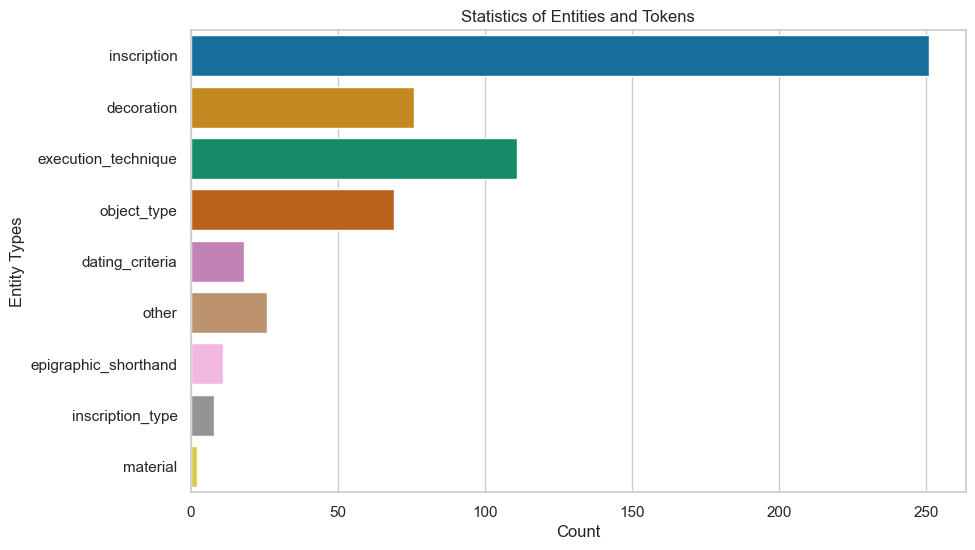

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Setting the seaborn style and creating the barplot
sns.set(style="whitegrid", palette="colorblind")
plt.figure(figsize=(10, 6))
sns.barplot(x="number", y="name", data=statistics_df)
plt.xlabel("Count")
plt.ylabel("Entity Types")
plt.title("Statistics of Entities and Tokens")

# Show the plot
plt.show()


In [42]:
# import pandas as pd
# import matplotlib.pyplot as plt
# statistics_df = pd.read_csv("data/Test_second/data/statistics.csv", sep = '\t')

In [44]:
# categories = ['number_of_inscription', 'number_of_material', 'number_of_other', 'number_of_dating_criteria', 'number_of_object_type', 'number_of_monument', 'number_of_monument_subtype', 'number_of_epigraphic_shorthand', 'number_of_decoration', 'number_of_preservation_state', 'number_of_inscription_type', 'number_of_monument_type', 'number_of_execution_technique', 'number_of_symbol']
# values = [statistics_df[statistics_df['name'] == category]['number'].iloc[0] for category in categories]

# categories_list= [category.removeprefix('number_of_') for category in categories]
# print(categories_list)
# print(values)
# plt.bar(categories_list, values)

# plt.title('Bar Chart On each entity category')

# plt.xlabel('Categories')
# plt.ylabel('Counts')
# plt.xticks(rotation=270)
# # 显示图表
# plt.show()

In [45]:
entity_words = []
#entity_types = []
for each_data in second_data:
    entities = each_data[1]['entities']
    sentence = each_data[0]
    for entity in entities:
        entity_name = entity[2]
        entity_start = entity[0]
        entity_end = entity[1]
        entity_word = sentence[entity_start:entity_end]
        entity_words.append([entity_word, entity_name])
        #entity_types.append(entity_name)

In [46]:
entity_words

[['апис ', 'inscription'],
 ['пис ', 'inscription'],
 ['графіті', 'inscription'],
 ['графіті', 'inscription'],
 ['рафіті ', 'inscription'],
 ['графіті', 'inscription'],
 ['графіті', 'inscription'],
 ['напис', 'inscription'],
 ['графіті', 'inscription'],
 ['особистість )', 'decoration'],
 ['івострова спонукає ', 'decoration'],
 ['півострова ,', 'decoration'],
 ['півострова ,', 'decoration'],
 ['півострова', 'execution_technique'],
 ['Головний герой', 'decoration'],
 ['преждевременность вывода', 'decoration'],
 ['языки ,', 'decoration'],
 ['ilename="02 ', 'execution_technique'],
 ['ilename="02 ', 'execution_technique'],
 ['собор', 'execution_technique'],
 ['ilename="02 ', 'execution_technique'],
 ['ilename="02 ', 'execution_technique'],
 ['ilename="02 ', 'execution_technique'],
 ['ерква ', 'execution_technique'],
 ['ітопис ', 'inscription'],
 ['рафіті ', 'inscription'],
 ['ilename="02 ', 'execution_technique'],
 ['ilename="02 ', 'execution_technique'],
 ['ilename="02 ', 'execution_techni

In [49]:
annotations = pd.read_csv('data/annotation/annotation.csv', sep = ',')

In [51]:
annotations.head()

,Unnamed: 0,keywords,freq,freq1,freq2,freq3,freq4,usage,type,B_start,inscription,nan
0,0,молитовний напис,126,16,1294.77771,0.00168,1293.610,Молитовний напис. 20 Розділ ІІ. <focus_corpus>,inscription_type,NaN,NaN,NaN
1,1,пам''ятний напис,59,720,606.28479,0.07539,564.710,Пам'ятний напис. 110 Розділ ІV. <focus_corpus>,inscription_type,NaN,NaN,NaN
2,2,чотириконечний хрест,55,46,565.18073,0.00482,563.467,На поверхні личкувального розчину прокреслений...,decoration,NaN,NaN,NaN
3,3,збереженість напису,32,0,328.83243,0.00000,329.832,"Збереженість напису доволі добра, його складов...",preservation_state,NaN,NaN,NaN
4,4,фресковий тиньк,27,86,277.45236,0.00901,275.967,Знаходиться на фресковому тиньку фасадної стін...,material,NaN,NaN,NaN


In [52]:
annotated = []
for keyword in annotations['keywords']:
    annotated.append(keyword)
new_detected = [entity_word for entity_word in entity_words if entity_word[0] not in annotated]
print(new_detected)

[['апис ', 'inscription'], ['пис ', 'inscription'], ['рафіті ', 'inscription'], ['особистість )', 'decoration'], ['івострова спонукає ', 'decoration'], ['півострова ,', 'decoration'], ['півострова ,', 'decoration'], ['півострова', 'execution_technique'], ['Головний герой', 'decoration'], ['преждевременность вывода', 'decoration'], ['языки ,', 'decoration'], ['ilename="02 ', 'execution_technique'], ['ilename="02 ', 'execution_technique'], ['ilename="02 ', 'execution_technique'], ['ilename="02 ', 'execution_technique'], ['ilename="02 ', 'execution_technique'], ['ерква ', 'execution_technique'], ['ітопис ', 'inscription'], ['рафіті ', 'inscription'], ['ilename="02 ', 'execution_technique'], ['ilename="02 ', 'execution_technique'], ['ilename="02 ', 'execution_technique'], ['ilename="02 ', 'execution_technique'], ['ilename="02 ', 'execution_technique'], ['асопис ', 'inscription'], ['обор ', 'execution_technique'], ['віті ', 'inscription'], ['онограма ', 'inscription'], ['ерква ', 'object_ty

In [53]:
new_detected_df = pd.DataFrame(new_detected, columns=['new_entity', 'type'])

In [54]:
new_detected_df.to_csv('data/Test_second/data/new_detected.csv', sep='\t')

In [55]:
print('the number of new detected entities is:', len(new_detected))
print('the number of total detected entities is:', len(entity_words))

the number of new detected entities is: 473
the number of total detected entities is: 572


In [56]:
new_detected_df

,new_entity,type
0,апис,inscription
1,пис,inscription
2,рафіті,inscription
3,особистість ),decoration
4,івострова спонукає,decoration
...,...,...
468,світі,inscription
469,літі,inscription
470,головний редактор,decoration
471,обор,execution_technique


In [75]:
new_detected_group_by_type = new_detected_df.groupby('type').count()
new_detected_group_by_type.columns = ['count']
new_detected_group_by_type

,count
type,
dating_criteria,14
decoration,76
epigraphic_shorthand,11
execution_technique,90
inscription,208
inscription_type,8
material,2
object_type,41
other,23


In [76]:
new_detected_group_by_type.index

Index(['dating_criteria', 'decoration', 'epigraphic_shorthand',
       'execution_technique', 'inscription', 'inscription_type', 'material',
       'object_type', 'other'],
      dtype='object', name='type')

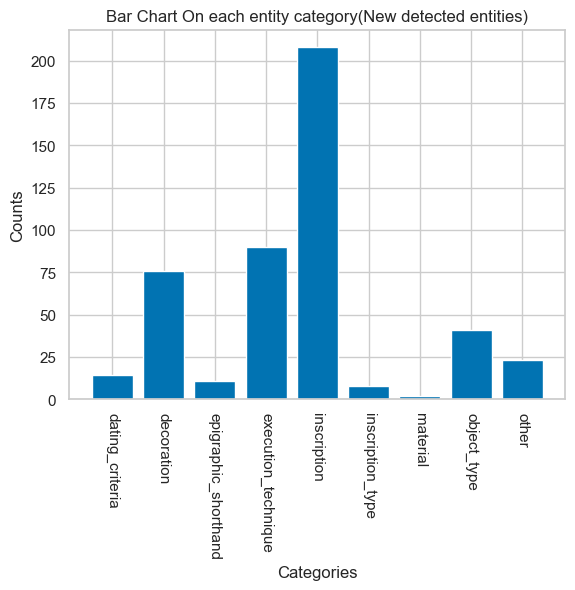

In [77]:
plt.bar(new_detected_group_by_type.index.to_list(), new_detected_group_by_type['count'])

plt.title('Bar Chart On each entity category(New detected entities)')

plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=270)
# 显示图表
plt.show()